In [1]:
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

A notebook to work on data prep and plotly visualizations so that I have things set up in a way that can be easily plugged in to the final dashboard. I'll be using plotly offline, so I'll simply insert static images screencapped from the html objects.

First a bit of data prep, using the city master csvs I prepared in the first big_deal notebook.

In [10]:
df = pd.read_csv('New_York_NY_master.csv')
df.head()

,years,TMAX,TMIN,t90,t95,t100
0,1947,46.821581,30.813200,0,0,0
1,1948,61.402767,42.641671,9,4,0
2,1949,64.488553,45.420937,20,8,0
3,1950,60.902360,43.011863,5,0,0
4,1951,62.462723,44.219303,1,0,0


A couple of quick prep steps - resetting the index, cutting off the first year (which is actually only a partial year's worth of data) and adding in trailing average columns, something I really should have done in my .py file that called the NOAA API and formatted these dataframes.

In [11]:
df.drop(0,inplace=True)
for metric in ['TMAX','TMIN','t90']:
    df[f'{metric}_rolling'] = [df[metric][0:n+1].mean() if n<10 else df[metric][n-10:n+1].mean() for
                              n in range(0,len(df))]
    
df.set_index('years',inplace=True)
df.head()

,TMAX,TMIN,t90,t95,t100,TMAX_rolling,TMIN_rolling,t90_rolling
years,,,,,,,,
1948,61.402767,42.641671,9,4,0,61.402767,42.641671,9.000000
1949,64.488553,45.420937,20,8,0,62.945660,44.031304,14.500000
1950,60.902360,43.011863,5,0,0,62.264560,43.691490,11.333333
1951,62.462723,44.219303,1,0,0,62.314101,43.823443,8.750000
1952,62.634314,44.782412,12,1,0,62.378143,44.015237,9.400000


As of my beginning this notebook, I'm still a little unsure what I want the final visualizations to look like. Part of the goal here is exploratory and simply continuing to get a better feel for the plotly layout.

Part of what makes plotly so excellent is that the default styling, without a whole lot of extra work, already looks pretty good.

In [14]:
metric = 'TMAX'
data = [go.Scatter(x=df.index, y=df[column], mode='lines') for column in [metric,f'{metric}_rolling']]
layout = go.Layout(title = f'{metric} and 10 year rolling average')
fig = go.Figure(data = data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

Produces:
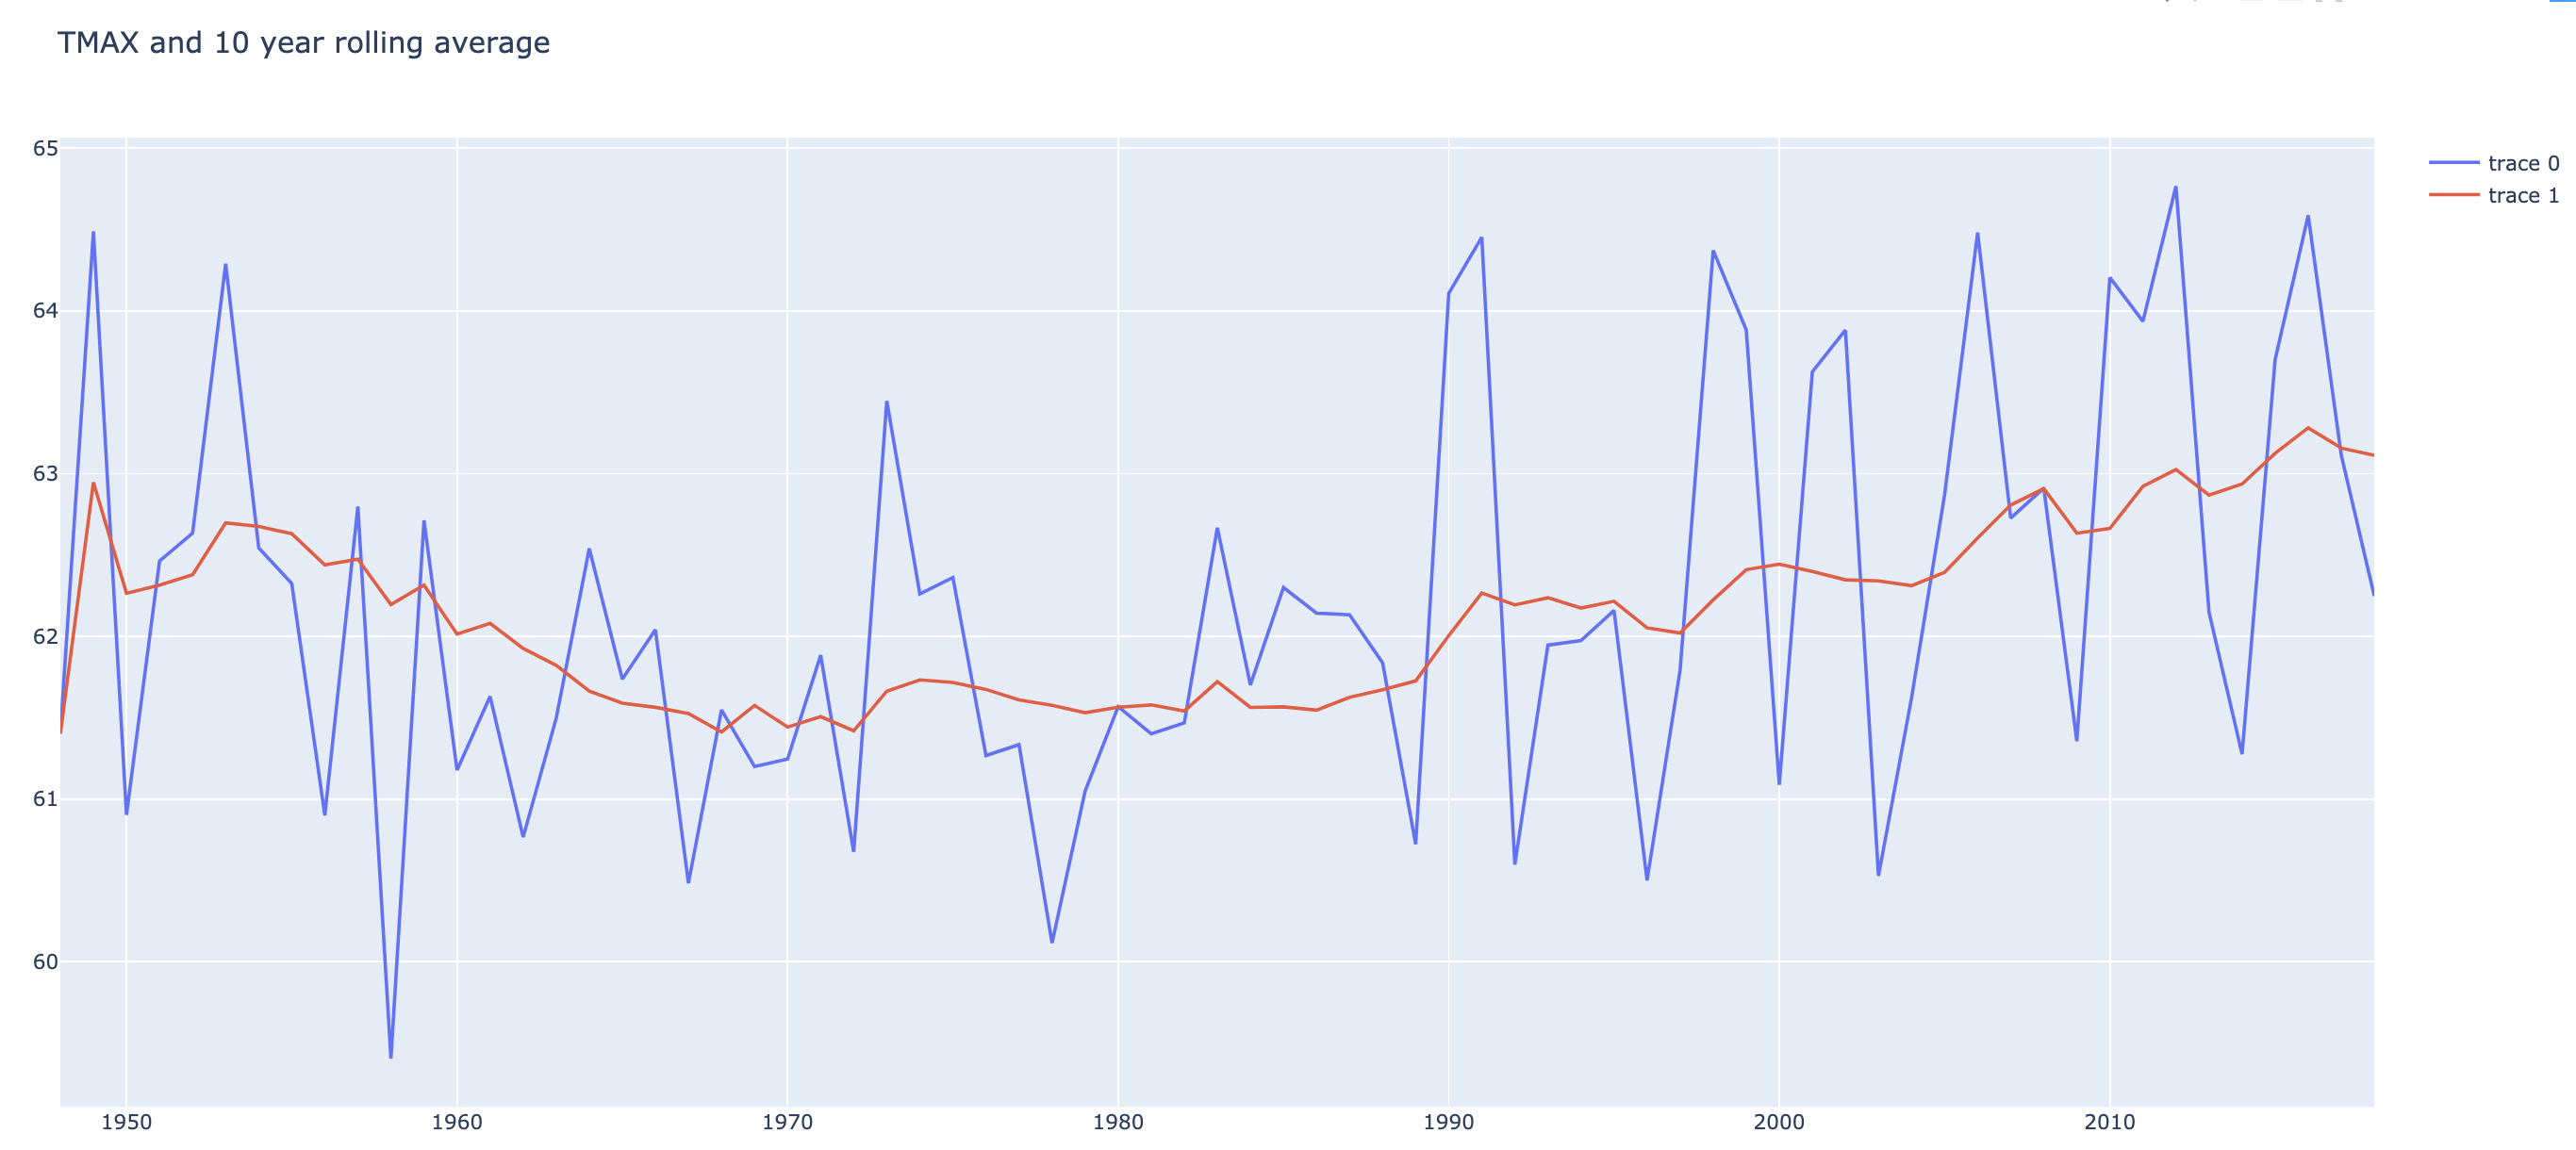

This does remind that at the very least I need to give the traces their appropriate names

In [15]:
metric = 'TMAX'
data = [go.Scatter(x=df.index, y=df[column], mode='lines', name=column) for column in [metric,f'{metric}_rolling']]
layout = go.Layout(title = f'{metric} and 10 year rolling average')
fig = go.Figure(data = data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

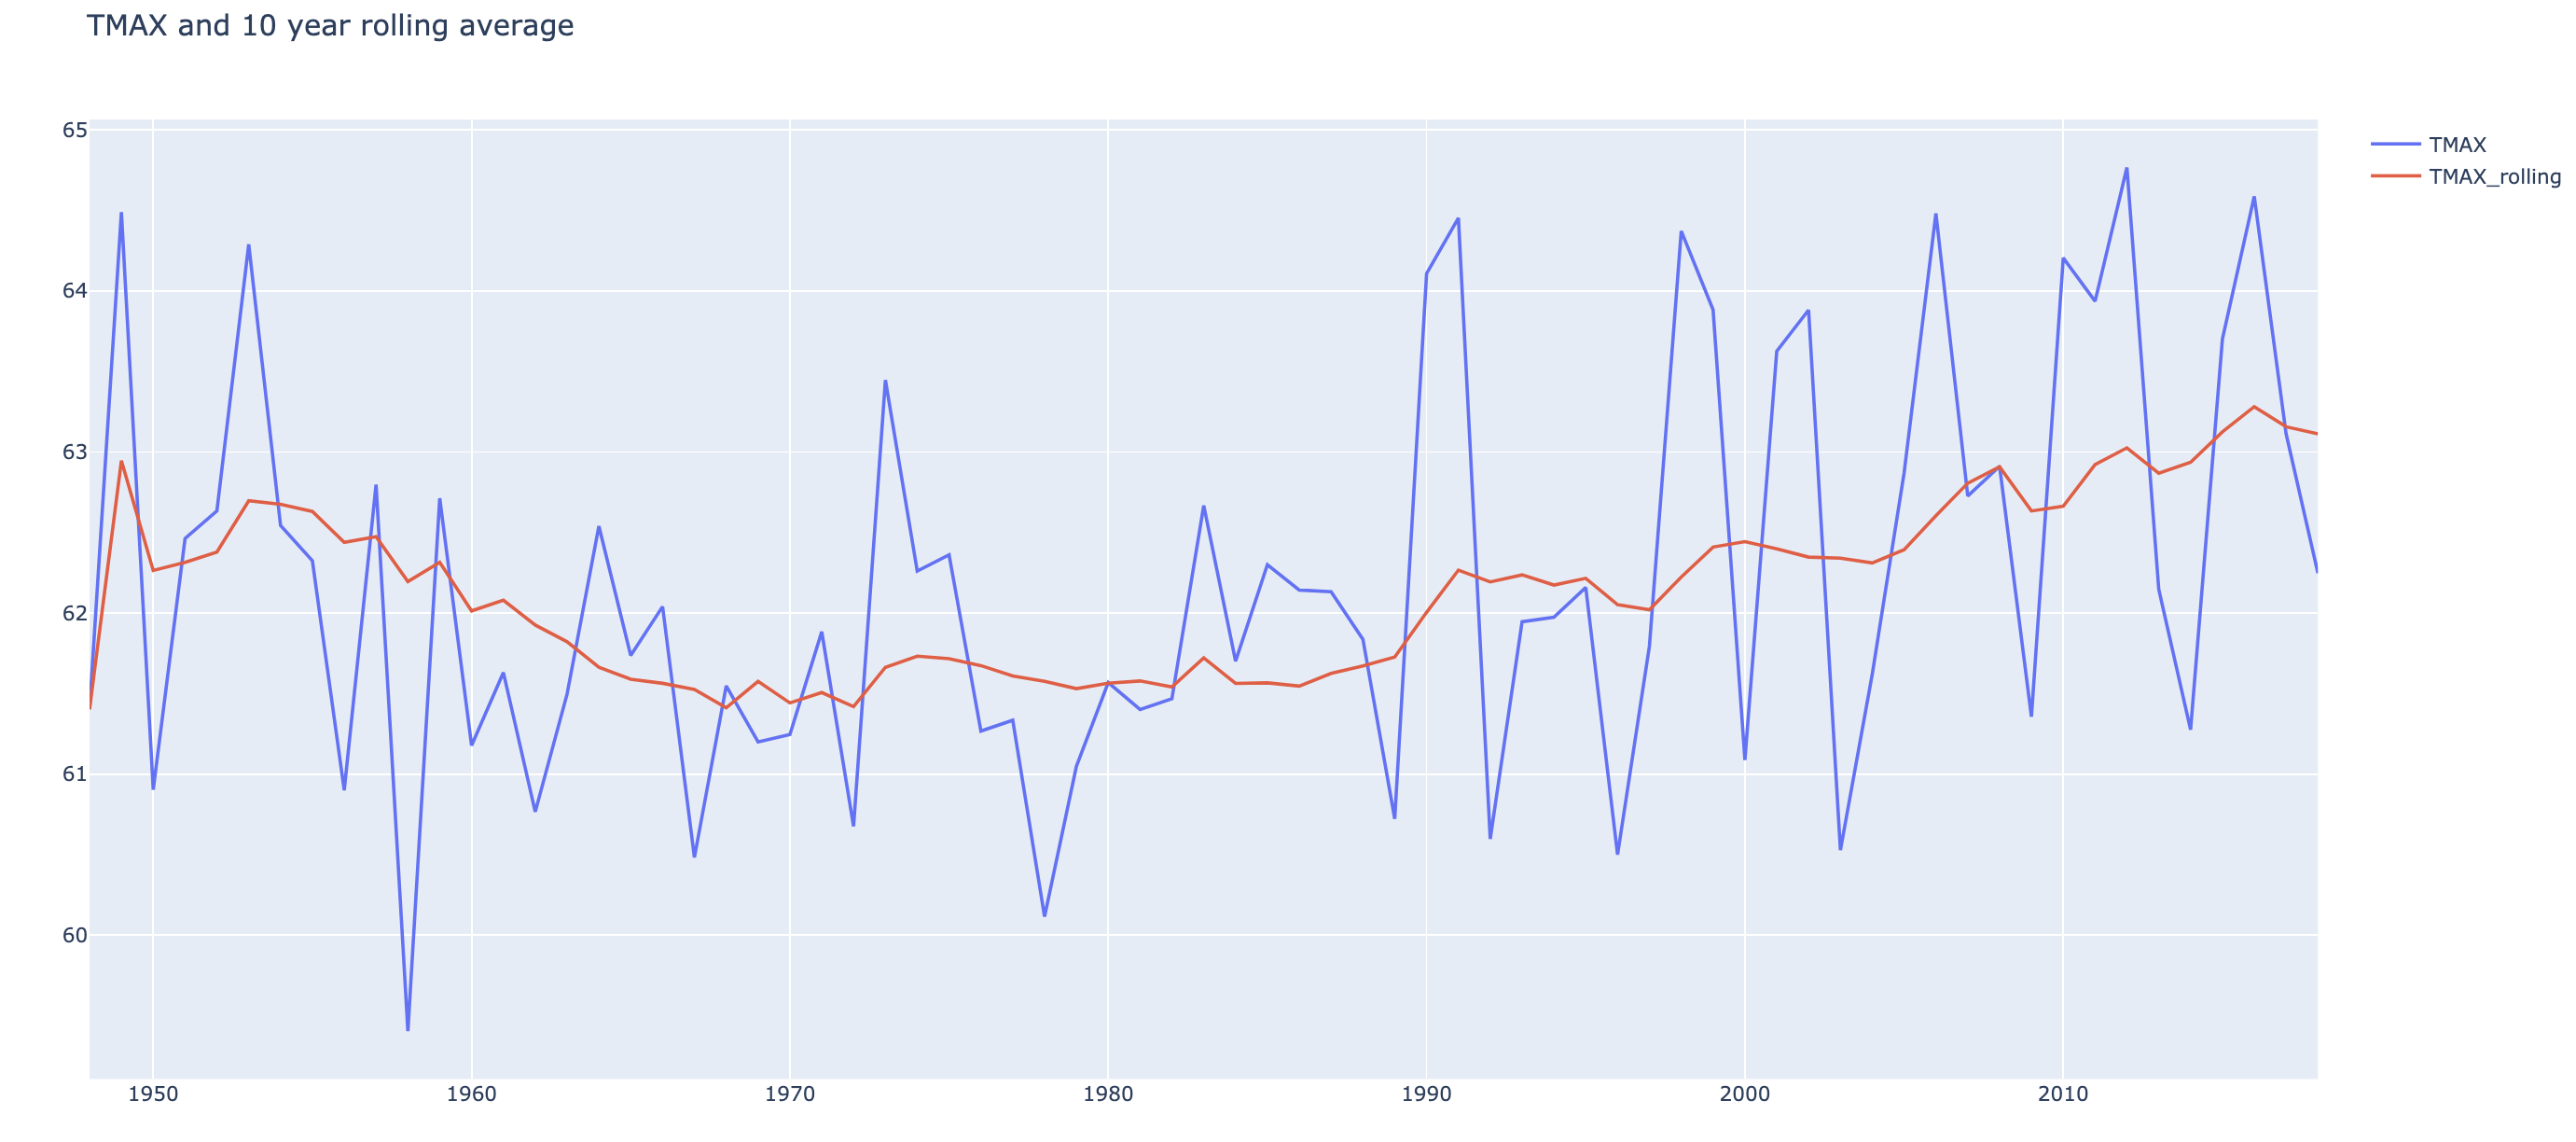

In [16]:
metric = 'TMIN'
data = [go.Scatter(x=df.index, y=df[column], mode='lines', name=column) for column in [metric,f'{metric}_rolling']]
layout = go.Layout(title = f'{metric} and 10 year rolling average')
fig = go.Figure(data = data, layout=layout)
pyo.plot(fig)

'temp-plot.html'